In [334]:
import scipy.stats


In [335]:
# def calculate_density(x):
#   ''' 

#   '''
#   return (1/(2*np.pi*np.var(x))**0.5)*np.exp(-((x - np.mean(x)**2)/2*np.var(x)))


import math


def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

In [336]:
from IPython.display import display, Javascript, HTML
import json

In [337]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

In [338]:
iris = load_iris()
iris = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                    columns=iris['feature_names'] + ['target'])


In [339]:
target_0 = iris.loc[iris['target'] == 0]
target_1 = iris.loc[iris['target'] == 1]
target_2 = iris.loc[iris['target'] == 2]

Text(0, 0.5, 'P(x)')

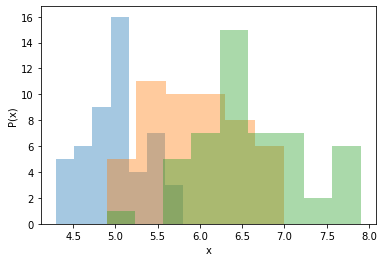

In [340]:
sns.distplot(target_0[['sepal length (cm)']], hist=True, kde=False)
sns.distplot(target_1[['sepal length (cm)']], hist=True, kde=False)
sns.distplot(target_2[['sepal length (cm)']], hist=True, kde=False)
plt.xlabel('x')
plt.ylabel('P(x)')

Text(0, 0.5, 'P(x)')

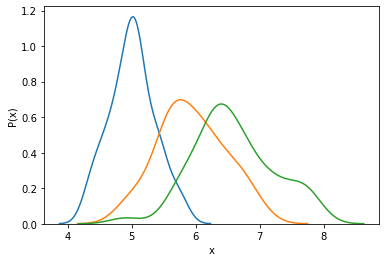

In [341]:
sns.distplot(target_0[['sepal length (cm)']], hist=False)
sns.distplot(target_1[['sepal length (cm)']], hist=False)
sns.distplot(target_2[['sepal length (cm)']], hist=False)
plt.xlabel('x')
plt.ylabel('P(x)')

In [360]:
arr_1 = []
data = target_0[['sepal length (cm)']].values
mean = np.mean(data)
var = np.var(data)

for x in data:
    arr_1.append({"p": scipy.stats.norm(mean, var).pdf(x)[0], "q": x[0]})
    

In [361]:
arr_2 = []
data = target_1[['sepal length (cm)']].values
mean = np.mean(data)
var = np.var(data)

for x in data:
    arr_2.append({"p": scipy.stats.norm(mean, var).pdf(x)[0], "q": x[0]})

In [362]:
arr_3 = []
data = target_2[['sepal length (cm)']].values
mean = np.mean(data)
var = np.var(data)

for x in data:
    arr_3.append({"p": scipy.stats.norm(mean, var).pdf(x)[0], "q": x[0]})

In [347]:
# // %%javascript
# // require.config({
# //     paths: { 
# //         jStat: 'https://cdn.jsdelivr.net/jstat/latest/jstat.min.js'
# //     }
# // });

In [364]:
display(Javascript("require.config({paths: {d3: 'https://d3js.org/d3.v5.min'}});"))
display(Javascript(filename="gaussian.js"))
display(HTML(filename="gaussian.css.html"))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [365]:
def _sort(x):
    return sorted(x,  key=lambda k: k['q'])

In [366]:
def draw_gaussian(arr_1, arr_2,arr_3, width, height):
        display(Javascript("""
        (function(element){
            require(['gaussian'], function(gaussian) {
                gaussian(element.get(0), %s, %s, %s, %d, %d);
            });
        })(element);
    """ % (json.dumps(_sort(arr_1)), json.dumps(_sort(arr_2)), json.dumps(_sort(arr_3)), width, height)))
    

In [367]:
draw_gaussian(arr_1, arr_2, arr_3, width=600, height=300)

<IPython.core.display.Javascript object>